# Flight delay prediction - Midterm project - Siddharth & Rachita

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Load the dataset

In [5]:
df = pd.read_csv('Flight delay 2023.csv')

## Display basic information about the dataset

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12373 entries, 0 to 12372
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 12373 non-null  int64  
 1   month                12373 non-null  int64  
 2   carrier              12373 non-null  object 
 3   carrier_name         12373 non-null  object 
 4   airport              12373 non-null  object 
 5   airport_name         12373 non-null  object 
 6   arr_flights          12355 non-null  float64
 7   arr_del15            12355 non-null  float64
 8   carrier_ct           12355 non-null  float64
 9   weather_ct           12355 non-null  float64
 10  nas_ct               12355 non-null  float64
 11  security_ct          12355 non-null  float64
 12  late_aircraft_ct     12355 non-null  float64
 13  arr_cancelled        12355 non-null  float64
 14  arr_diverted         12355 non-null  float64
 15  arr_delay            12355 non-null 

## Display the first few rows of the dataset

In [11]:
print(df.head())

   year  month carrier       carrier_name airport  \
0  2023      8      9E  Endeavor Air Inc.     ABE   
1  2023      8      9E  Endeavor Air Inc.     ABY   
2  2023      8      9E  Endeavor Air Inc.     AEX   
3  2023      8      9E  Endeavor Air Inc.     AGS   
4  2023      8      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         89.0       13.0   
1             Albany, GA: Southwest Georgia Regional         62.0       10.0   
2           Alexandria, LA: Alexandria International         62.0       10.0   
3        Augusta, GA: Augusta Regional at Bush Field         66.0       12.0   
4                   Albany, NY: Albany International         92.0       22.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        2.25        1.60  ...          0.0              5.99            2.0   
1        1.97        0.04  ...          

## Check for missing values

In [14]:
print(df.isnull().sum())

year                    0
month                   0
carrier                 0
carrier_name            0
airport                 0
airport_name            0
arr_flights            18
arr_del15              18
carrier_ct             18
weather_ct             18
nas_ct                 18
security_ct            18
late_aircraft_ct       18
arr_cancelled          18
arr_diverted           18
arr_delay              18
carrier_delay          18
weather_delay          18
nas_delay              18
security_delay         18
late_aircraft_delay    18
dtype: int64


## Display summary statistics

In [17]:
print(df.describe())

          year         month   arr_flights     arr_del15    carrier_ct  \
count  12373.0  12373.000000  12355.000000  12355.000000  12355.000000   
mean    2023.0      4.512083    367.901416     82.842088     27.730462   
std        0.0      2.291578   1016.136066    223.618477     65.802296   
min     2023.0      1.000000      1.000000      0.000000      0.000000   
25%     2023.0      3.000000     51.000000      8.000000      2.960000   
50%     2023.0      5.000000     97.000000     21.000000      8.070000   
75%     2023.0      7.000000    250.500000     59.000000     23.105000   
max     2023.0      8.000000  20084.000000   4142.000000   1293.910000   

         weather_ct        nas_ct   security_ct  late_aircraft_ct  \
count  12355.000000  12355.000000  12355.000000      12355.000000   
mean       2.996298     21.231170      0.250875         30.633336   
std        9.546003     65.005592      0.972349         94.869611   
min        0.000000      0.000000      0.000000          

## Convert 'month' to categorical data type

In [20]:
df['month'] = df['month'].astype('category')

## Function to detect and remove outliers using IQR method

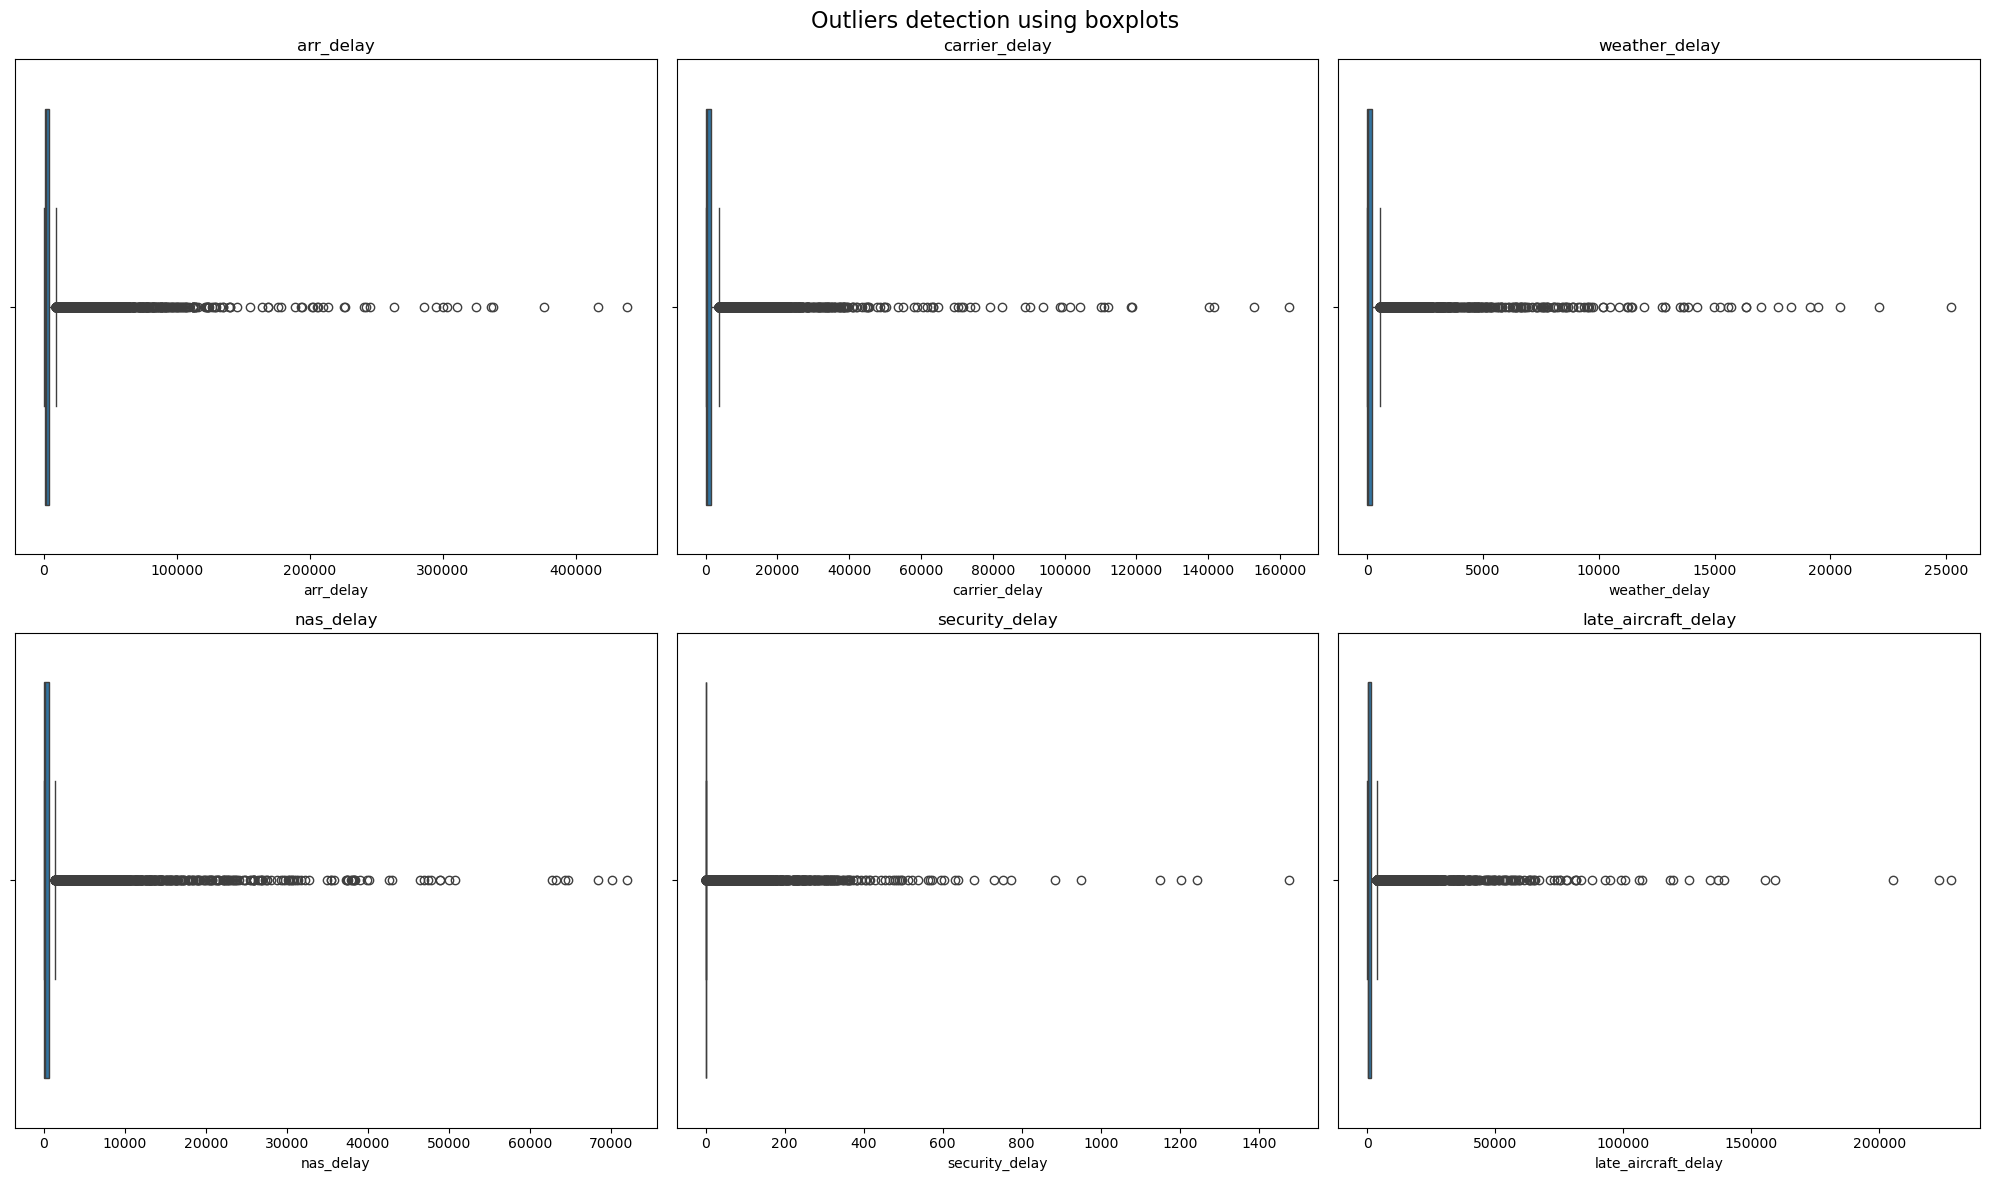

Original dataset shape: (12373, 21)
Dataset shape after removing outliers: (7054, 21)


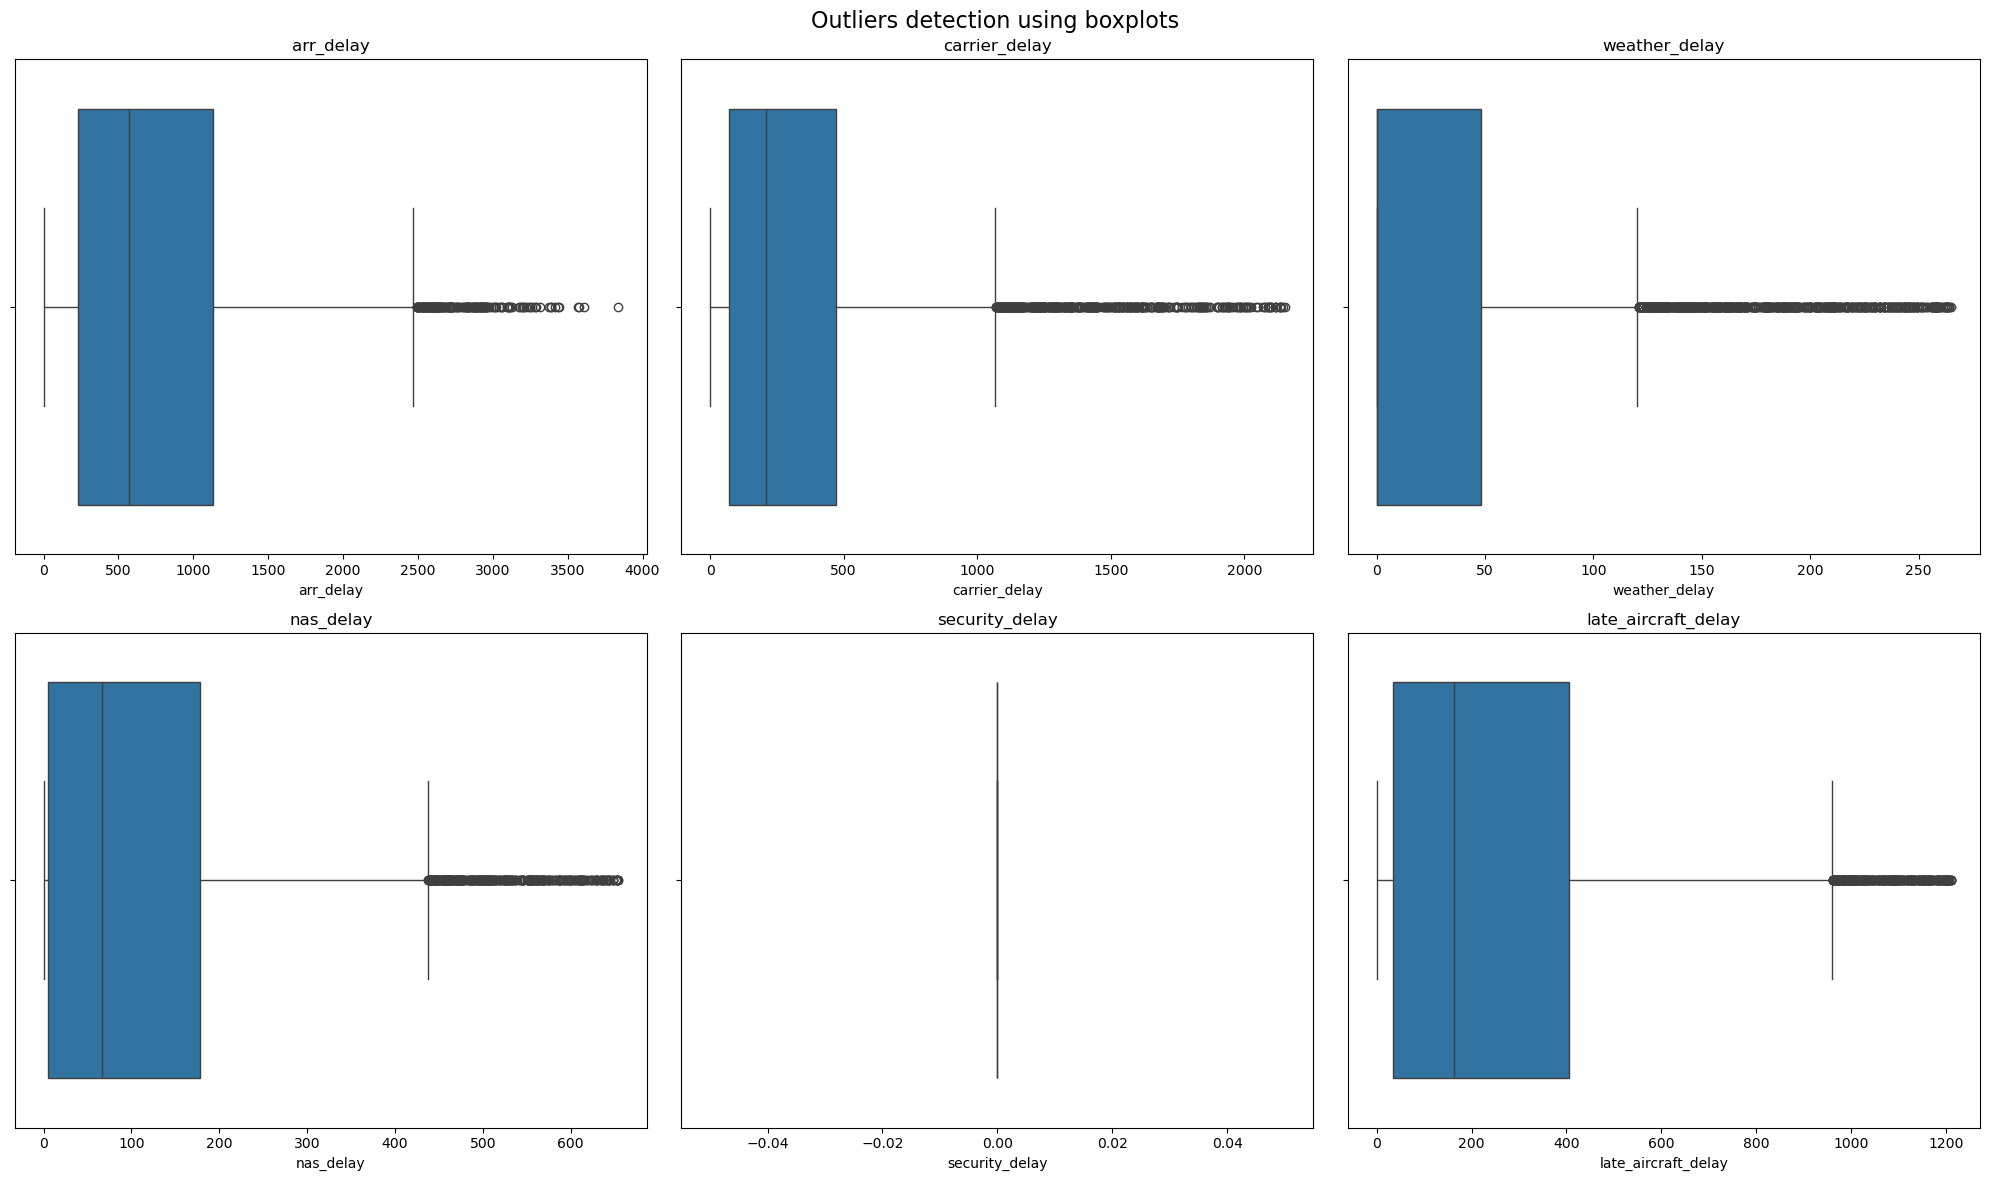

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to check for outliers
numerical_columns = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Create subplots for boxplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Outliers detection using boxplots', fontsize=16)

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(column)

plt.tight_layout()
plt.show()

# Remove outliers from each column
df_clean = df.copy()
for column in numerical_columns:
    df_clean = remove_outliers(df_clean, column)

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_clean.shape}")

# Create subplots for boxplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Outliers detection using boxplots', fontsize=16)

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_clean[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(column)

plt.tight_layout()
plt.show()

## Check class imbalance for 'carrier'

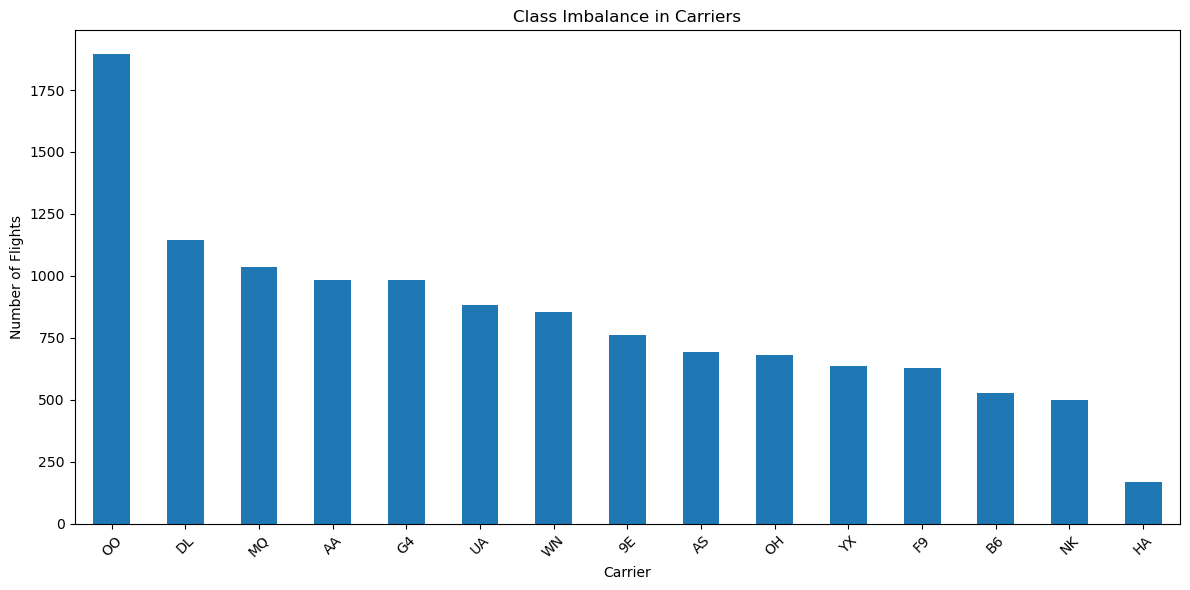

Imbalance ratio (max/min): 11.29


In [26]:
carrier_counts = df['carrier'].value_counts()
plt.figure(figsize=(12, 6))
carrier_counts.plot(kind='bar')
plt.title('Class Imbalance in Carriers')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate and print imbalance ratio
imbalance_ratio = carrier_counts.max() / carrier_counts.min()
print(f"Imbalance ratio (max/min): {imbalance_ratio:.2f}")

## Function to check & treat skewness

Skewness of arr_delay: 9.94
Applied log transformation to arr_delay
Skewness of arr_delay_log: -0.90

Skewness of carrier_delay: 10.74
Applied log transformation to carrier_delay
Skewness of carrier_delay_log: -0.86

Skewness of weather_delay: 9.76
Applied log transformation to weather_delay
Skewness of weather_delay_log: 0.04

Skewness of nas_delay: 8.67
Applied log transformation to nas_delay
Skewness of nas_delay_log: -0.50

Skewness of security_delay: 10.43
Applied log transformation to security_delay
Skewness of security_delay_log: 2.18

Skewness of late_aircraft_delay: 11.39
Applied log transformation to late_aircraft_delay
Skewness of late_aircraft_delay_log: -0.78



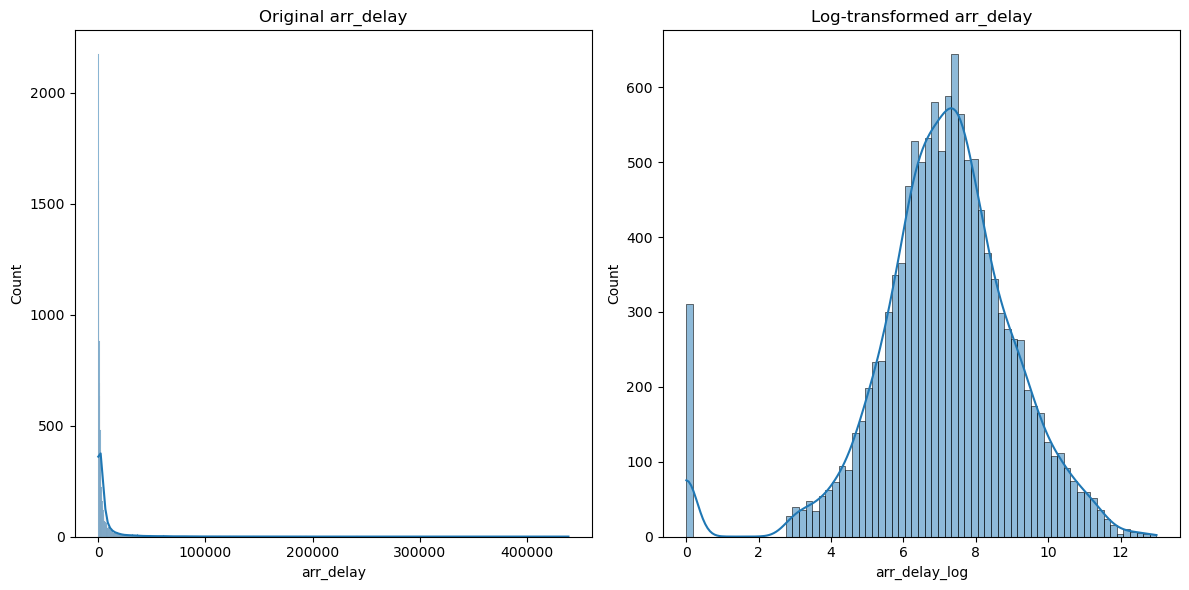

In [29]:
def check_skewness(df, column):
    skewness = df[column].skew()
    print(f"Skewness of {column}: {skewness:.2f}")
    return skewness

# apply log transformation
def apply_log_transform(df, column):
    df[f"{column}_log"] = np.log1p(df[column])
    return df

# Check skewness for numerical columns
for column in numerical_columns:
    skewness = check_skewness(df, column)
    
    # If skewness is high, apply log transformation
    if abs(skewness) > 1:
        df = apply_log_transform(df, column)
        print(f"Applied log transformation to {column}")
        check_skewness(df, f"{column}_log")
    
    print()

# Visualize original vs transformed data for a highly skewed column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['arr_delay'], kde=True)
plt.title('Original arr_delay')

plt.subplot(1, 2, 2)
sns.histplot(df['arr_delay_log'], kde=True)
plt.title('Log-transformed arr_delay')

plt.tight_layout()
plt.show()

## Analyze delay types

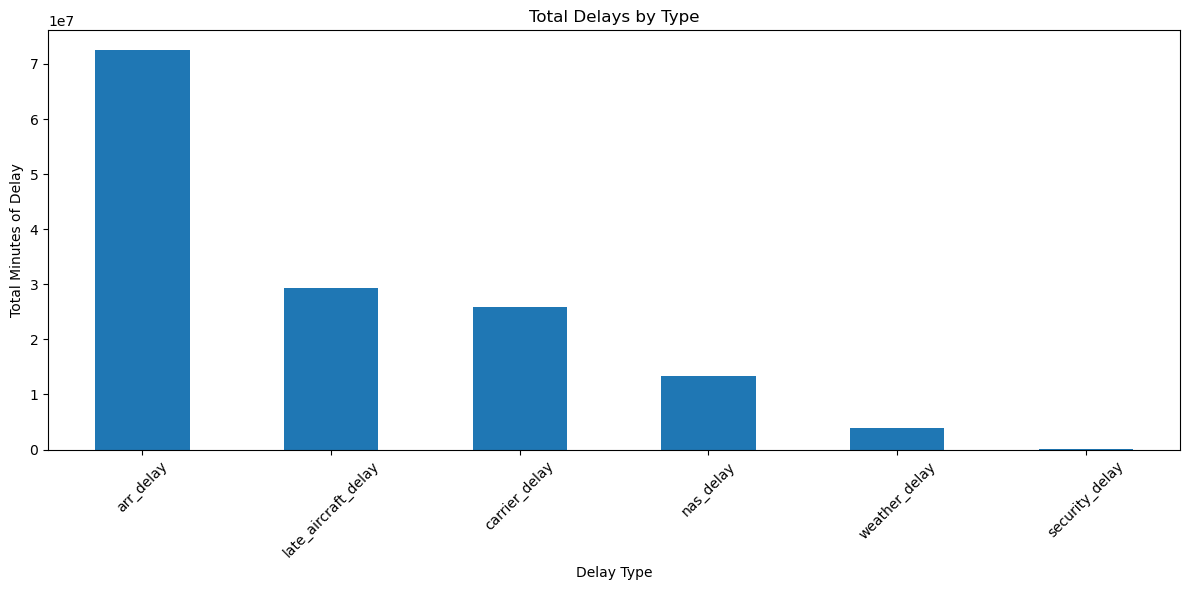

In [32]:
delay_types = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_summary = df[delay_types].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
delay_summary.plot(kind='bar')
plt.title('Total Delays by Type')
plt.ylabel('Total Minutes of Delay')
plt.xlabel('Delay Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analyze average delays by carrier

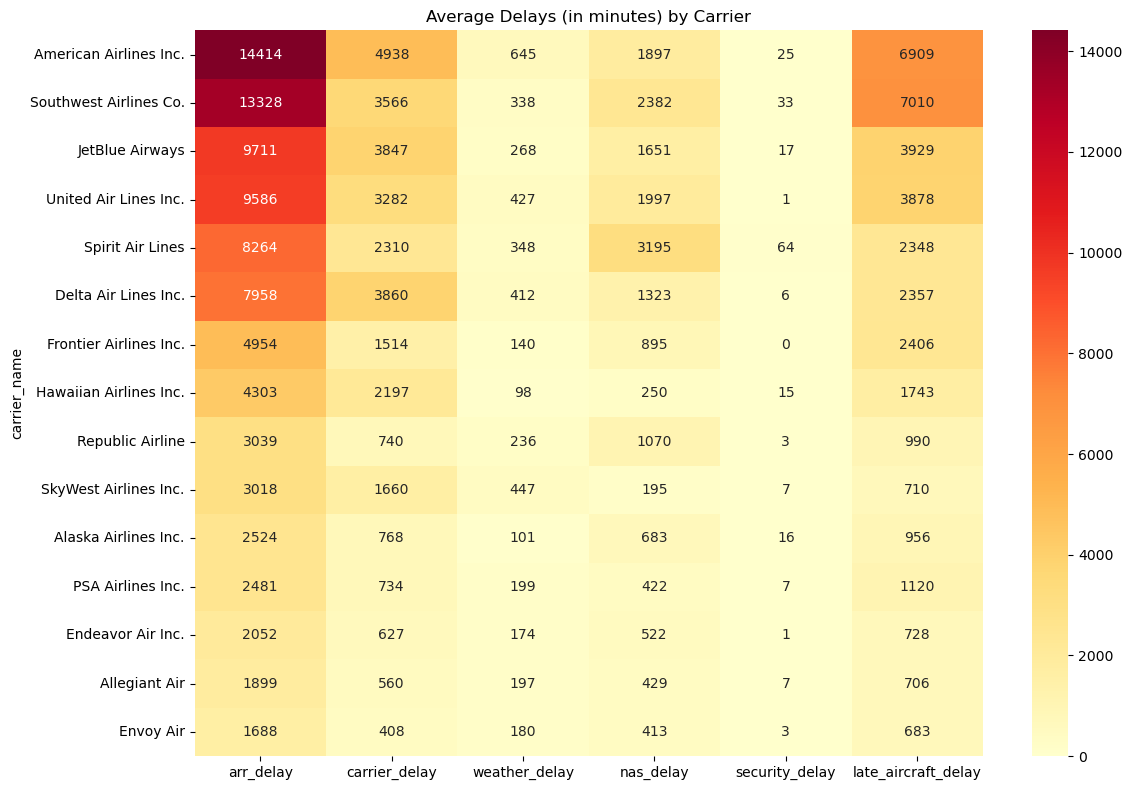

In [35]:
avg_delays = df.groupby('carrier_name')[delay_types].mean().sort_values('arr_delay', ascending=False)
plt.figure(figsize=(12, 8))
sns.heatmap(avg_delays, annot=True, cmap='YlOrRd', fmt='.0f')
plt.title('Average Delays (in minutes) by Carrier')
plt.tight_layout()
plt.show()

## Analyze delays by month

/var/folders/kd/xjysn2295b7b3wgz5sp3dyx80000gn/T/ipykernel_1177/3975648106.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_delays = df.groupby('month')[delay_types].mean()


<Figure size 1200x600 with 0 Axes>

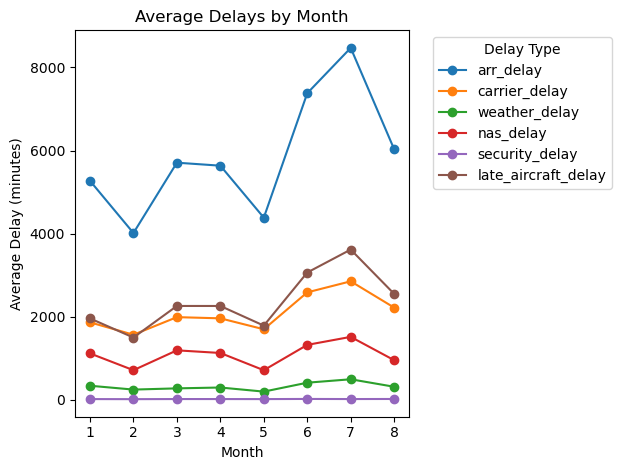

In [38]:
monthly_delays = df.groupby('month')[delay_types].mean()
plt.figure(figsize=(12, 6))
monthly_delays.plot(kind='line', marker='o')
plt.title('Average Delays by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Delay Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Select relevant columns for correlation analysis

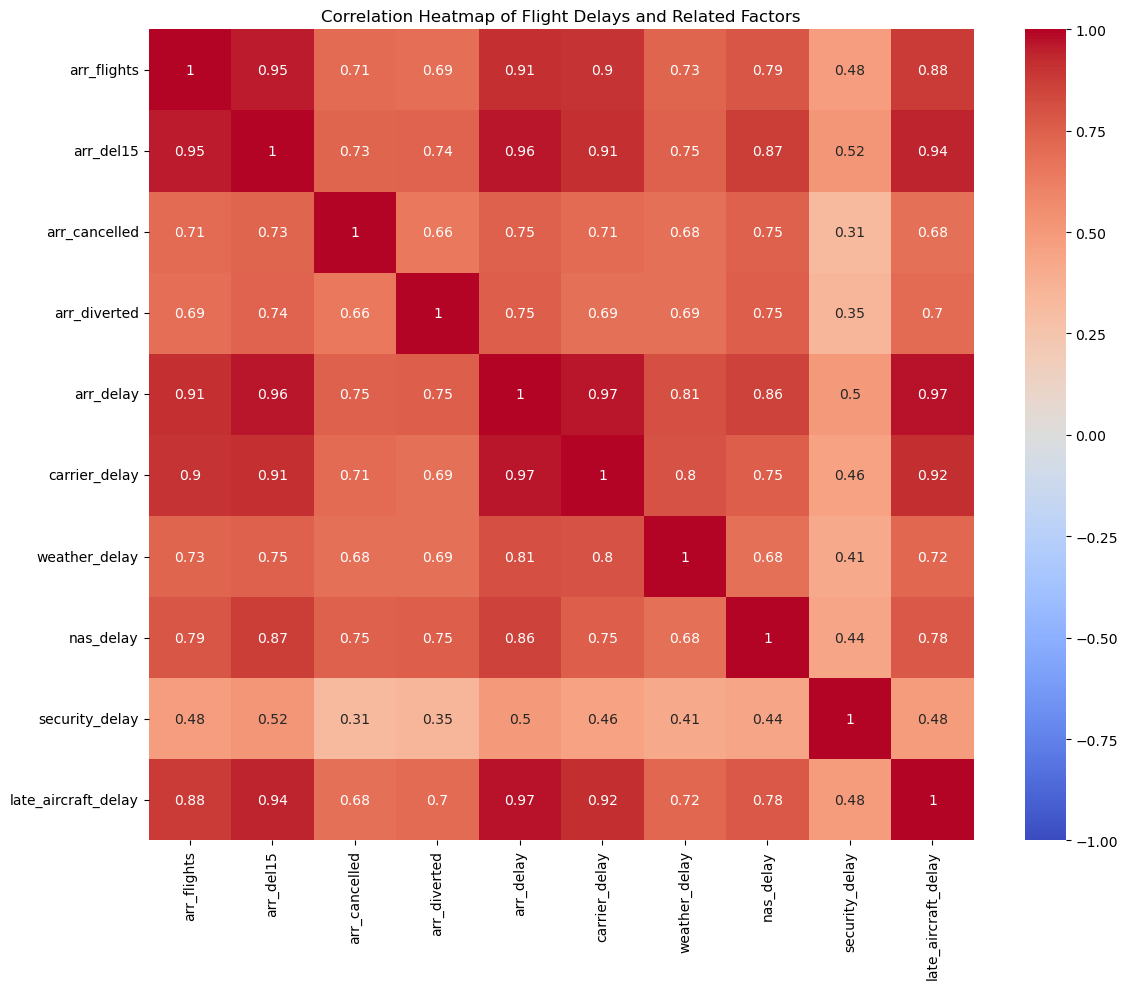

In [41]:
correlation_columns = ['arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Calculate correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Flight Delays and Related Factors')
plt.tight_layout()
plt.show()

## Delay Distribution Analysis

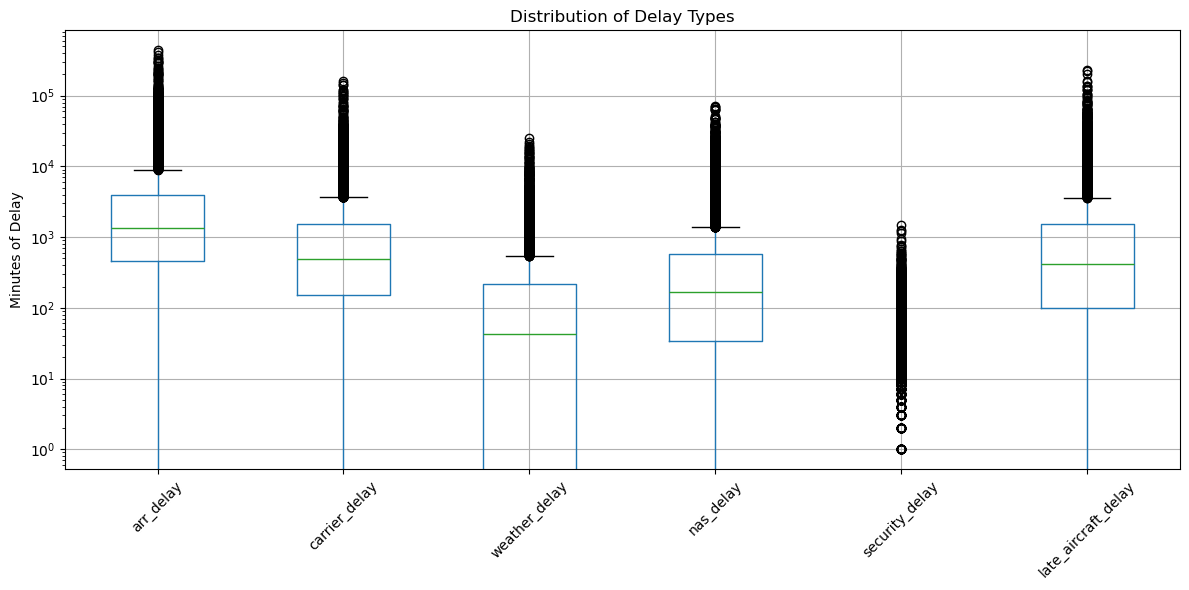

In [44]:
delay_types = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

plt.figure(figsize=(12, 6))
df[delay_types].boxplot()
plt.title('Distribution of Delay Types')
plt.ylabel('Minutes of Delay')
plt.yscale('log')  # Using log scale for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Delay Trends by Airport

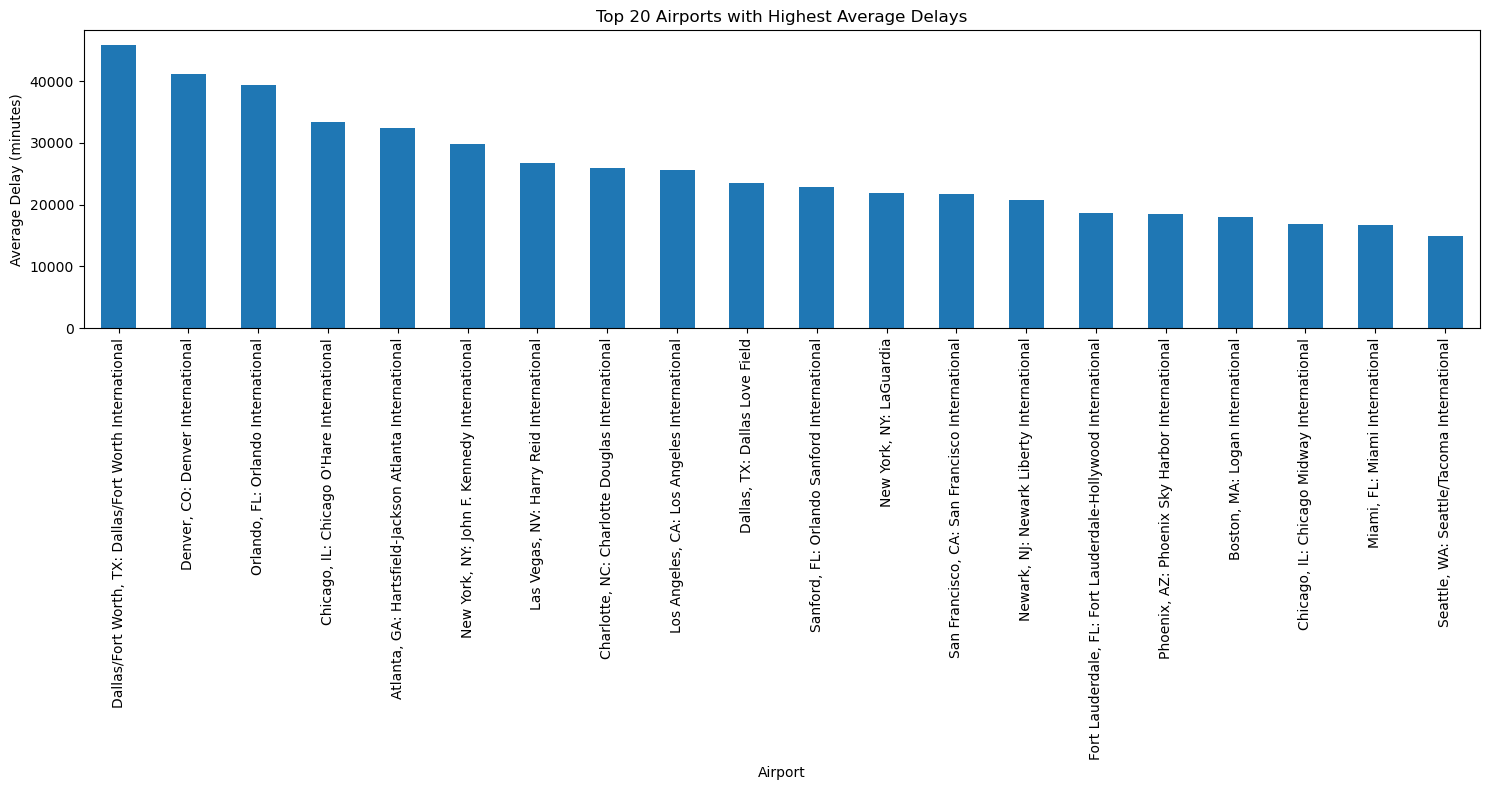

In [47]:
top_20_delayed_airports = df.groupby('airport_name')['arr_delay'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(15, 8))
top_20_delayed_airports.plot(kind='bar')
plt.title('Top 20 Airports with Highest Average Delays')
plt.xlabel('Airport')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Delay Types Proportion

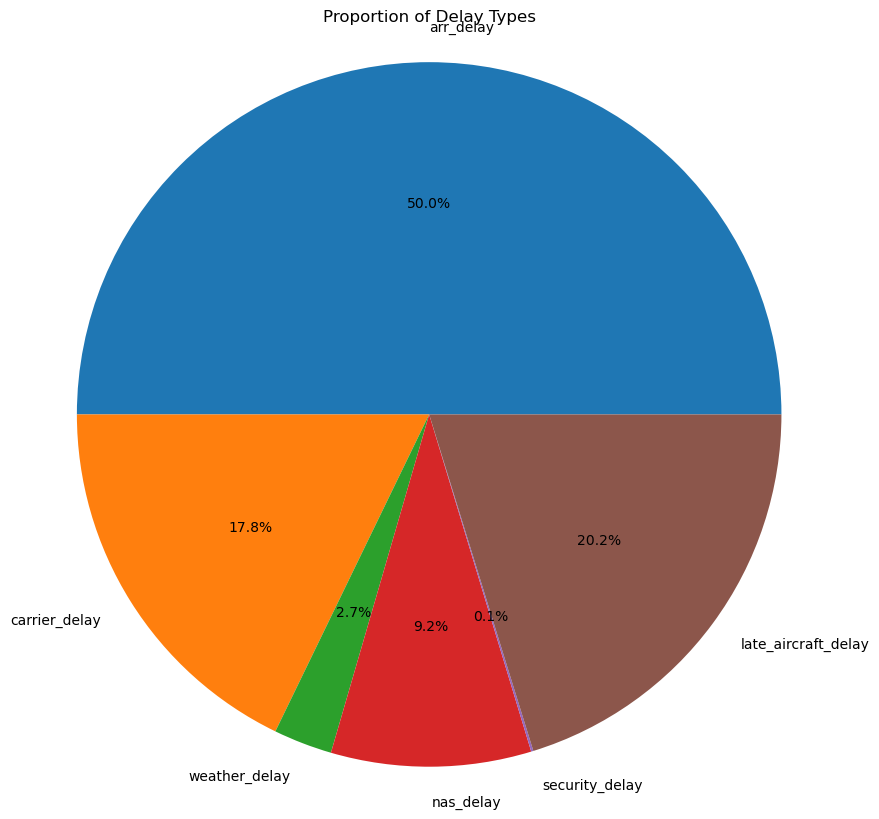

In [50]:
delay_sum = df[delay_types].sum()
plt.figure(figsize=(10, 10))
plt.pie(delay_sum, labels=delay_types, autopct='%1.1f%%')
plt.title('Proportion of Delay Types')
plt.axis('equal')
plt.show()

## Cancellations and Diversions Analysis

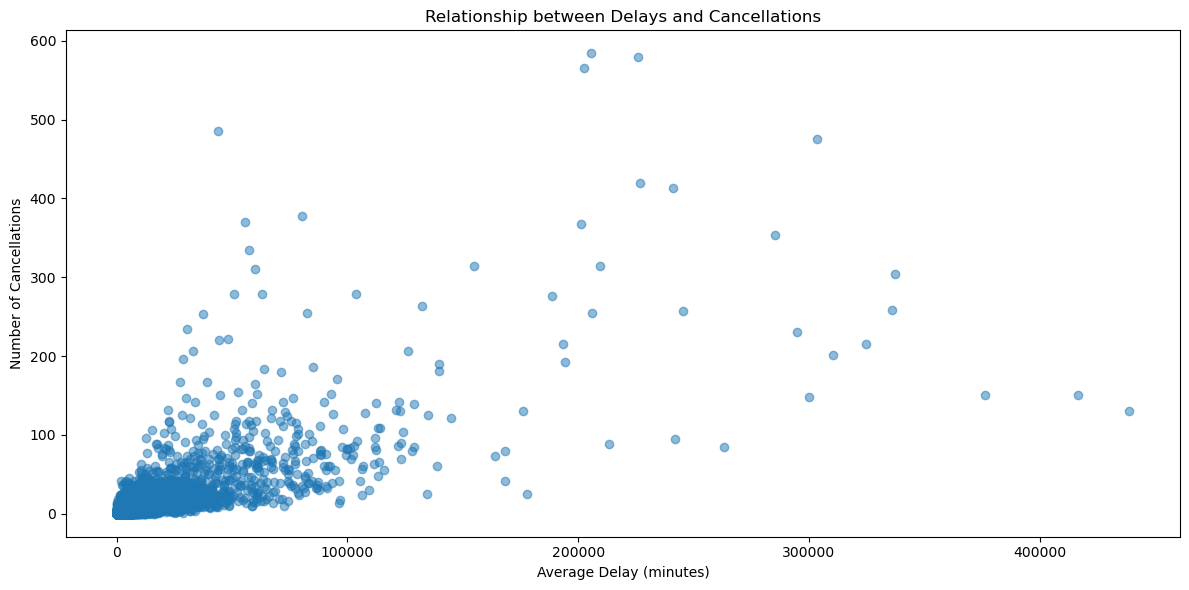

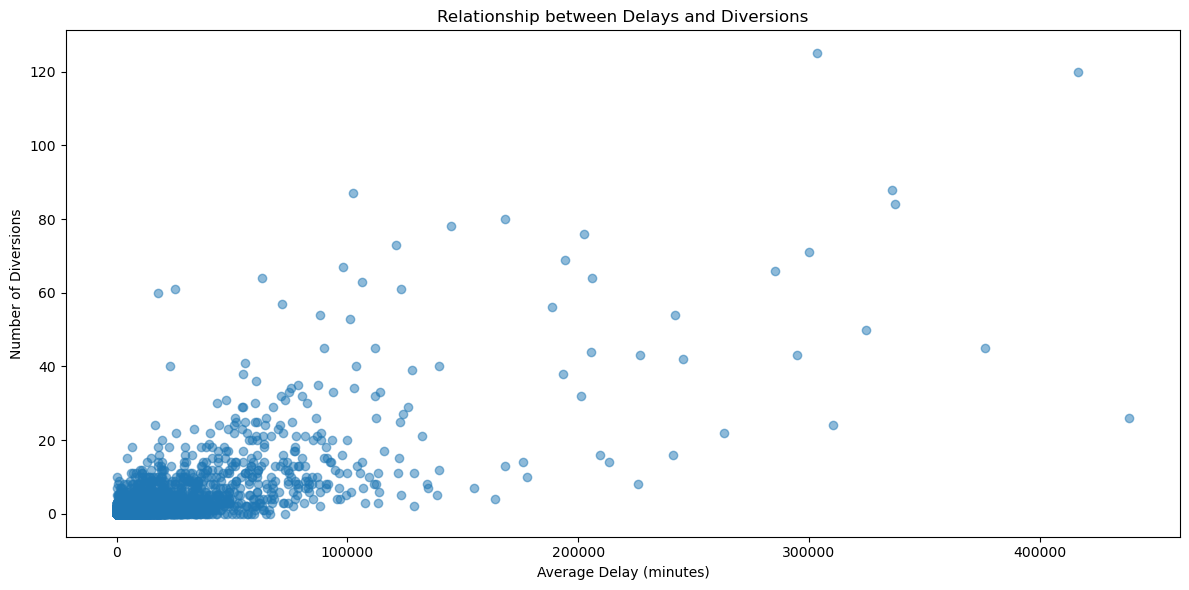

In [53]:
plt.figure(figsize=(12, 6))
plt.scatter(df['arr_delay'], df['arr_cancelled'], alpha=0.5)
plt.title('Relationship between Delays and Cancellations')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Number of Cancellations')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(df['arr_delay'], df['arr_diverted'], alpha=0.5)
plt.title('Relationship between Delays and Diversions')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Number of Diversions')
plt.tight_layout()
plt.show()

## Carrier Performance Analysis

<Figure size 1500x800 with 0 Axes>

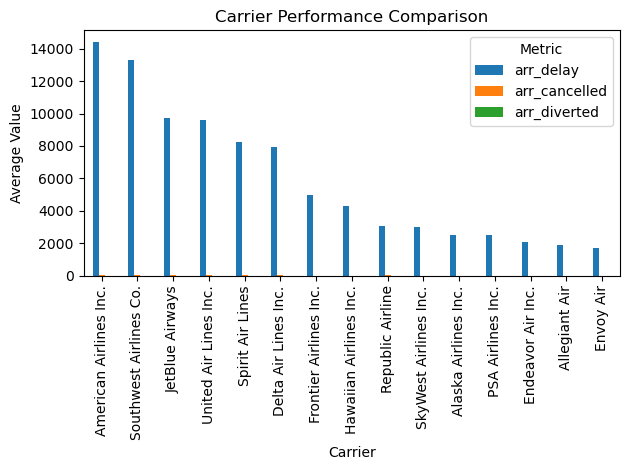

In [56]:
carrier_performance = df.groupby('carrier_name')[['arr_delay', 'arr_cancelled', 'arr_diverted']].mean().sort_values('arr_delay', ascending=False)

plt.figure(figsize=(15, 8))
carrier_performance.plot(kind='bar')
plt.title('Carrier Performance Comparison')
plt.xlabel('Carrier')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Applying Logistic Regression

Logistic Regression Results:
Accuracy: 0.9717171717171718
Precision: 0.9717171717171718
Recall: 1.0
F1 Score: 0.985655737704918


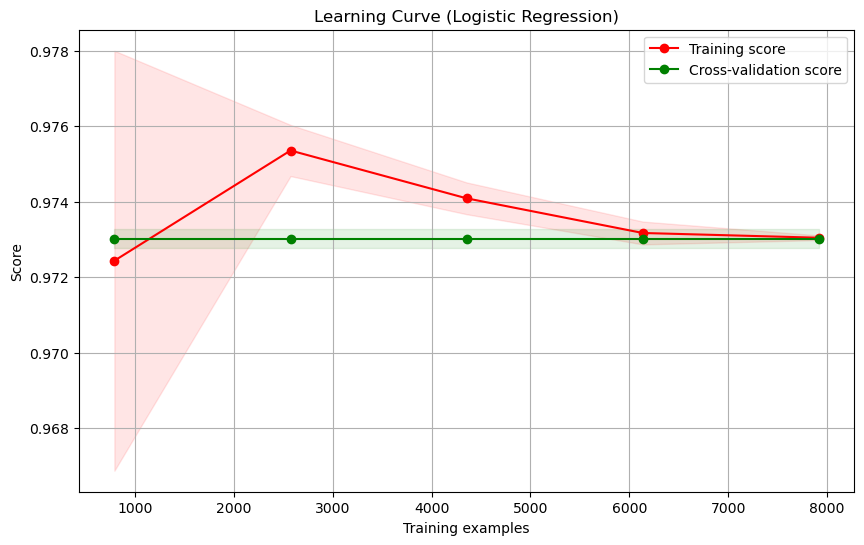

In [59]:
# Create a binary target variable: 1 if delayed (arr_delay > 15 minutes), 0 otherwise
df['delayed'] = (df['arr_delay'] > 15).astype(int)

# Select features for the model
features = ['month', 'arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
X = df[features]
y = df['delayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    lr_model, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Applying Decision Tree 

Decision Tree Results:
Accuracy: 0.997979797979798
Precision: 1.0
Recall: 0.997920997920998
F1 Score: 0.9989594172736732


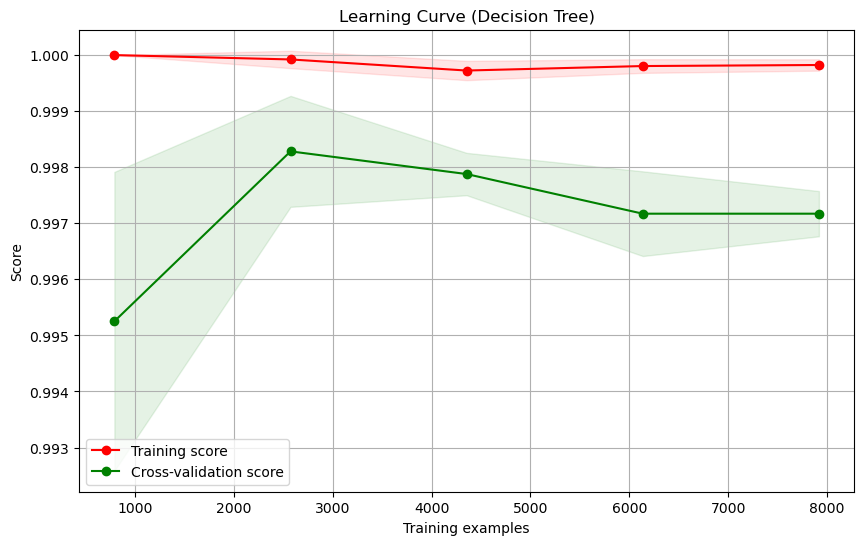

In [61]:
# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test_scaled)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("Decision Tree Results:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Decision Tree)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Applying Gradient Boosting

Gradient Boosting Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


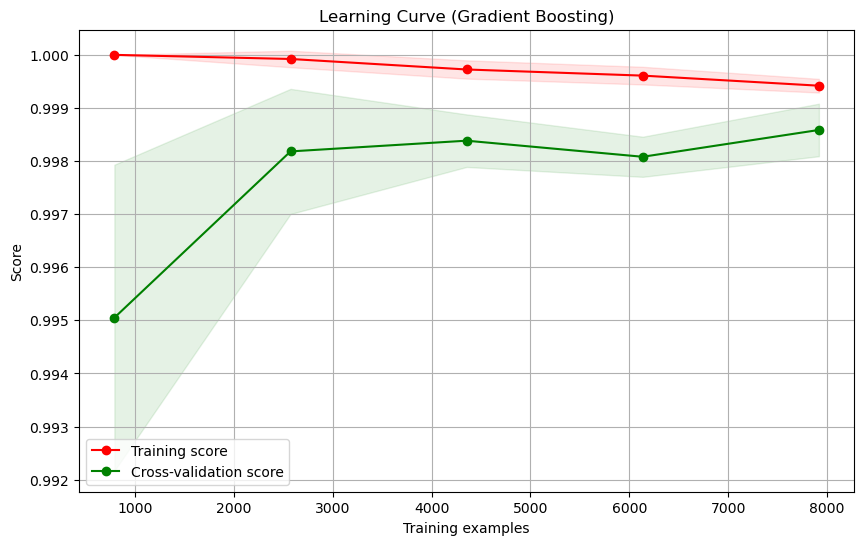

In [65]:
# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test_scaled)

# Calculate metrics
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

print("Gradient Boosting Results:")
print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1 Score: {gb_f1}")

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    gb_model, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Gradient Boosting)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Applying Random Forest

Random Forest Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


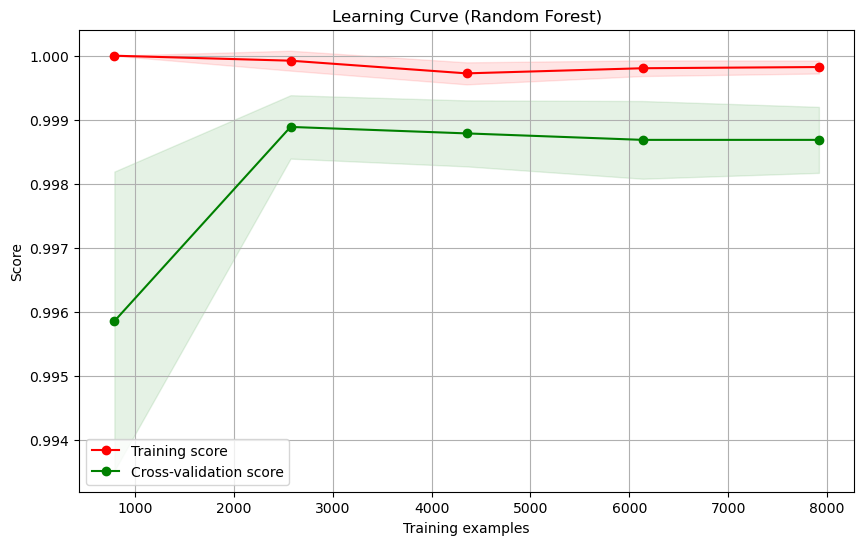

In [67]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test_scaled)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

## Comaparing the machine learning algorithms

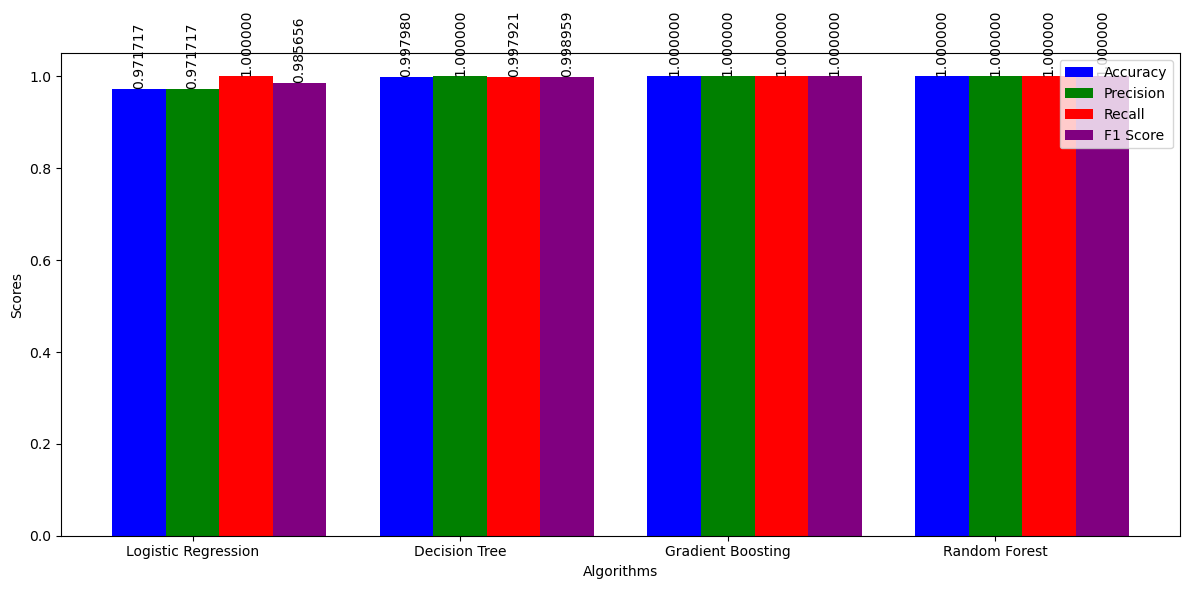

In [71]:
# Define the algorithms and their performance metrics
algorithms = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting', 'Random Forest']
accuracy = [lr_accuracy, dt_accuracy, gb_accuracy, rf_accuracy]
precision = [lr_precision, dt_precision, gb_precision, rf_precision]
recall = [lr_recall, dt_recall, gb_recall, rf_recall]
f1_score = [lr_f1, dt_f1, gb_f1, rf_f1]

# Set the width of each bar and the positions of the bars
bar_width = 0.2
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, color='blue', width=bar_width, label='Accuracy')
plt.bar(r2, precision, color='green', width=bar_width, label='Precision')
plt.bar(r3, recall, color='red', width=bar_width, label='Recall')
plt.bar(r4, f1_score, color='purple', width=bar_width, label='F1 Score')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Scores')
plt.title('')
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# Add a legend
plt.legend()

# Add value labels on top of each bar
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                 f'{height:.6f}',
                 ha='center', va='bottom', rotation=90)

add_labels(plt.bar(r1, accuracy, color='blue', width=bar_width))
add_labels(plt.bar(r2, precision, color='green', width=bar_width))
add_labels(plt.bar(r3, recall, color='red', width=bar_width))
add_labels(plt.bar(r4, f1_score, color='purple', width=bar_width))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()